<a href="https://colab.research.google.com/github/mayurishou/my_fun_projects/blob/main/Gas_turbine_emission_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3f57d410fc7a06c15220427b99d88d91e6c193dac646351d9971c48f44dbcb75
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependen

In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Preprocessing data

In [ ]:
df=pd.read_csv("/content/gt_full.csv")
df.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [ ]:
#Dropping unnecessary columns
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [ ]:
df_cols = df.columns
df_cols = np.array(df_cols)
df_cols

array(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

Initial Visualization

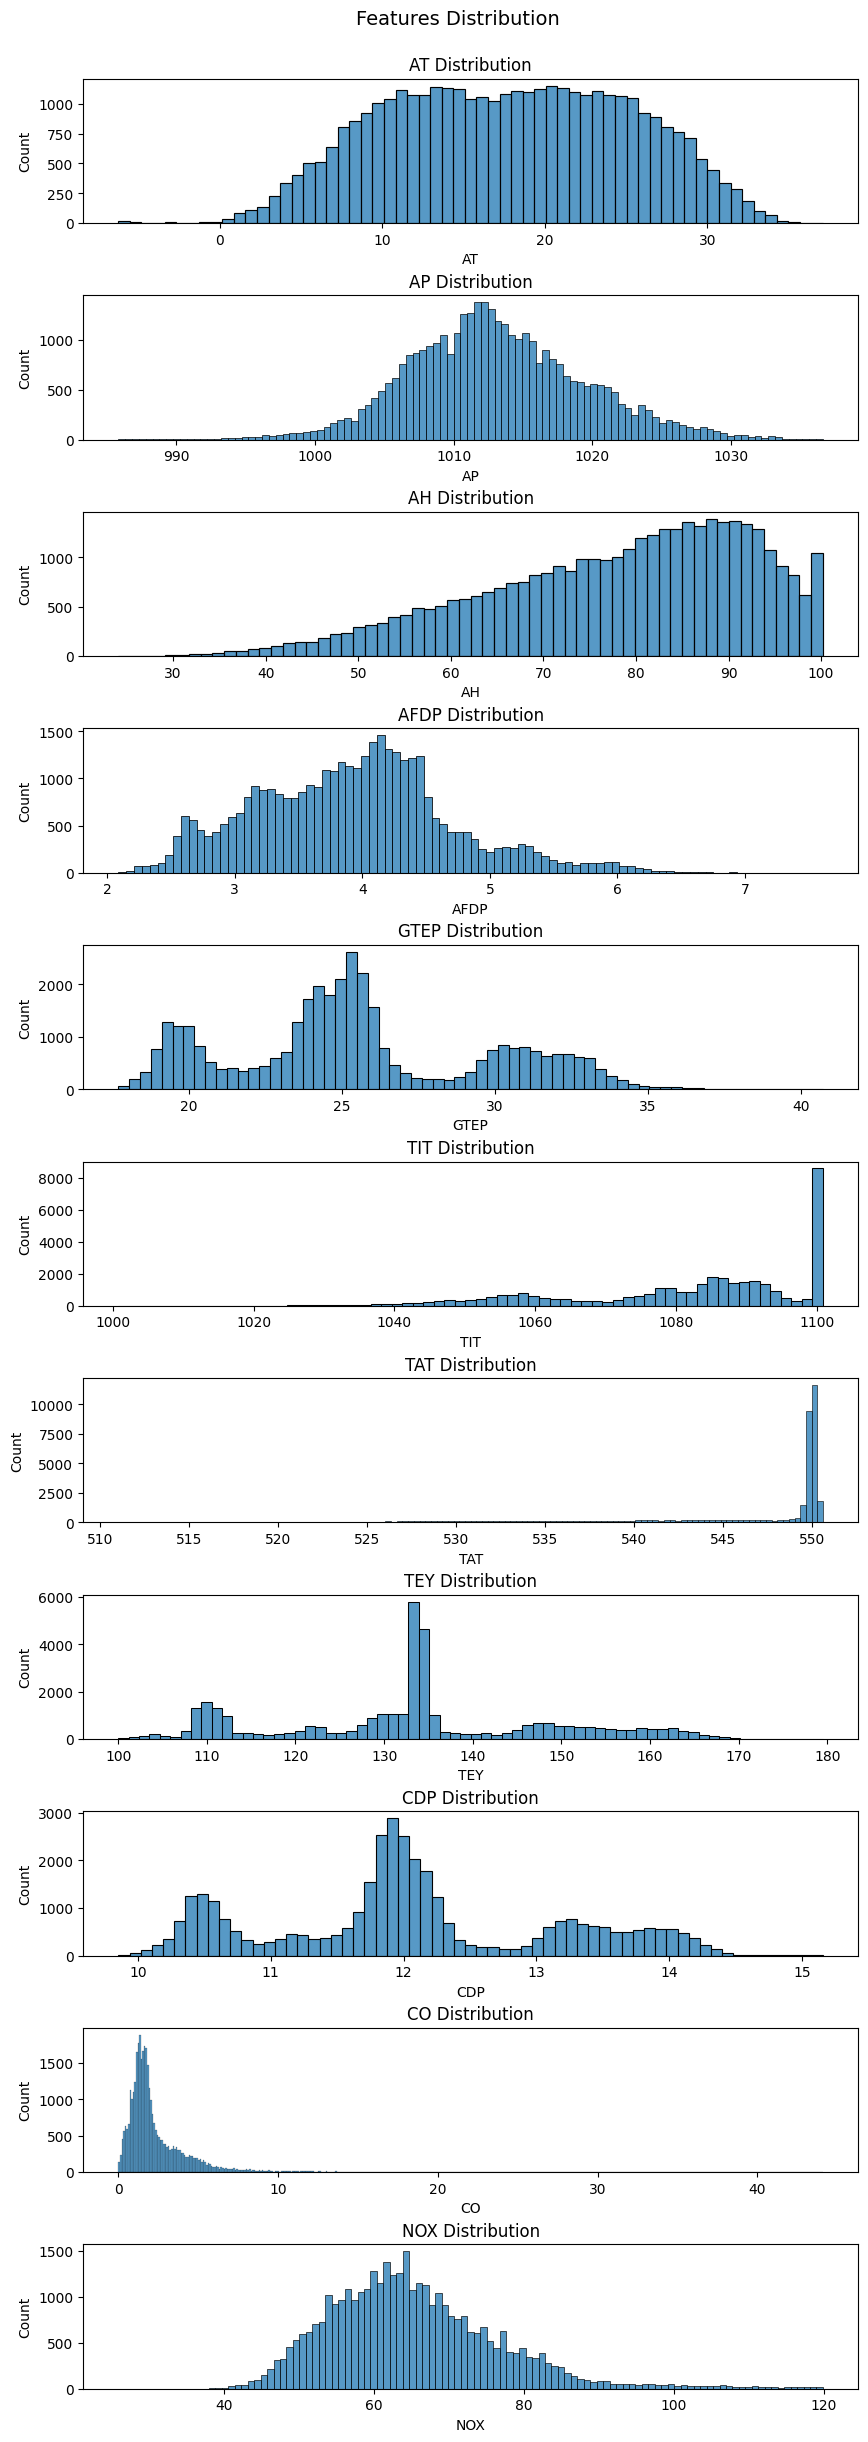

In [ ]:
fig, axes=plt.subplots(11,1,figsize=(10,30))
for i,col in enumerate(df_cols):
    sns.histplot(x=col, data=df, ax=axes[i])
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"{col} Distribution")
fig.text(0.5, 0.9,"Features Distribution",va="center", ha="center", fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

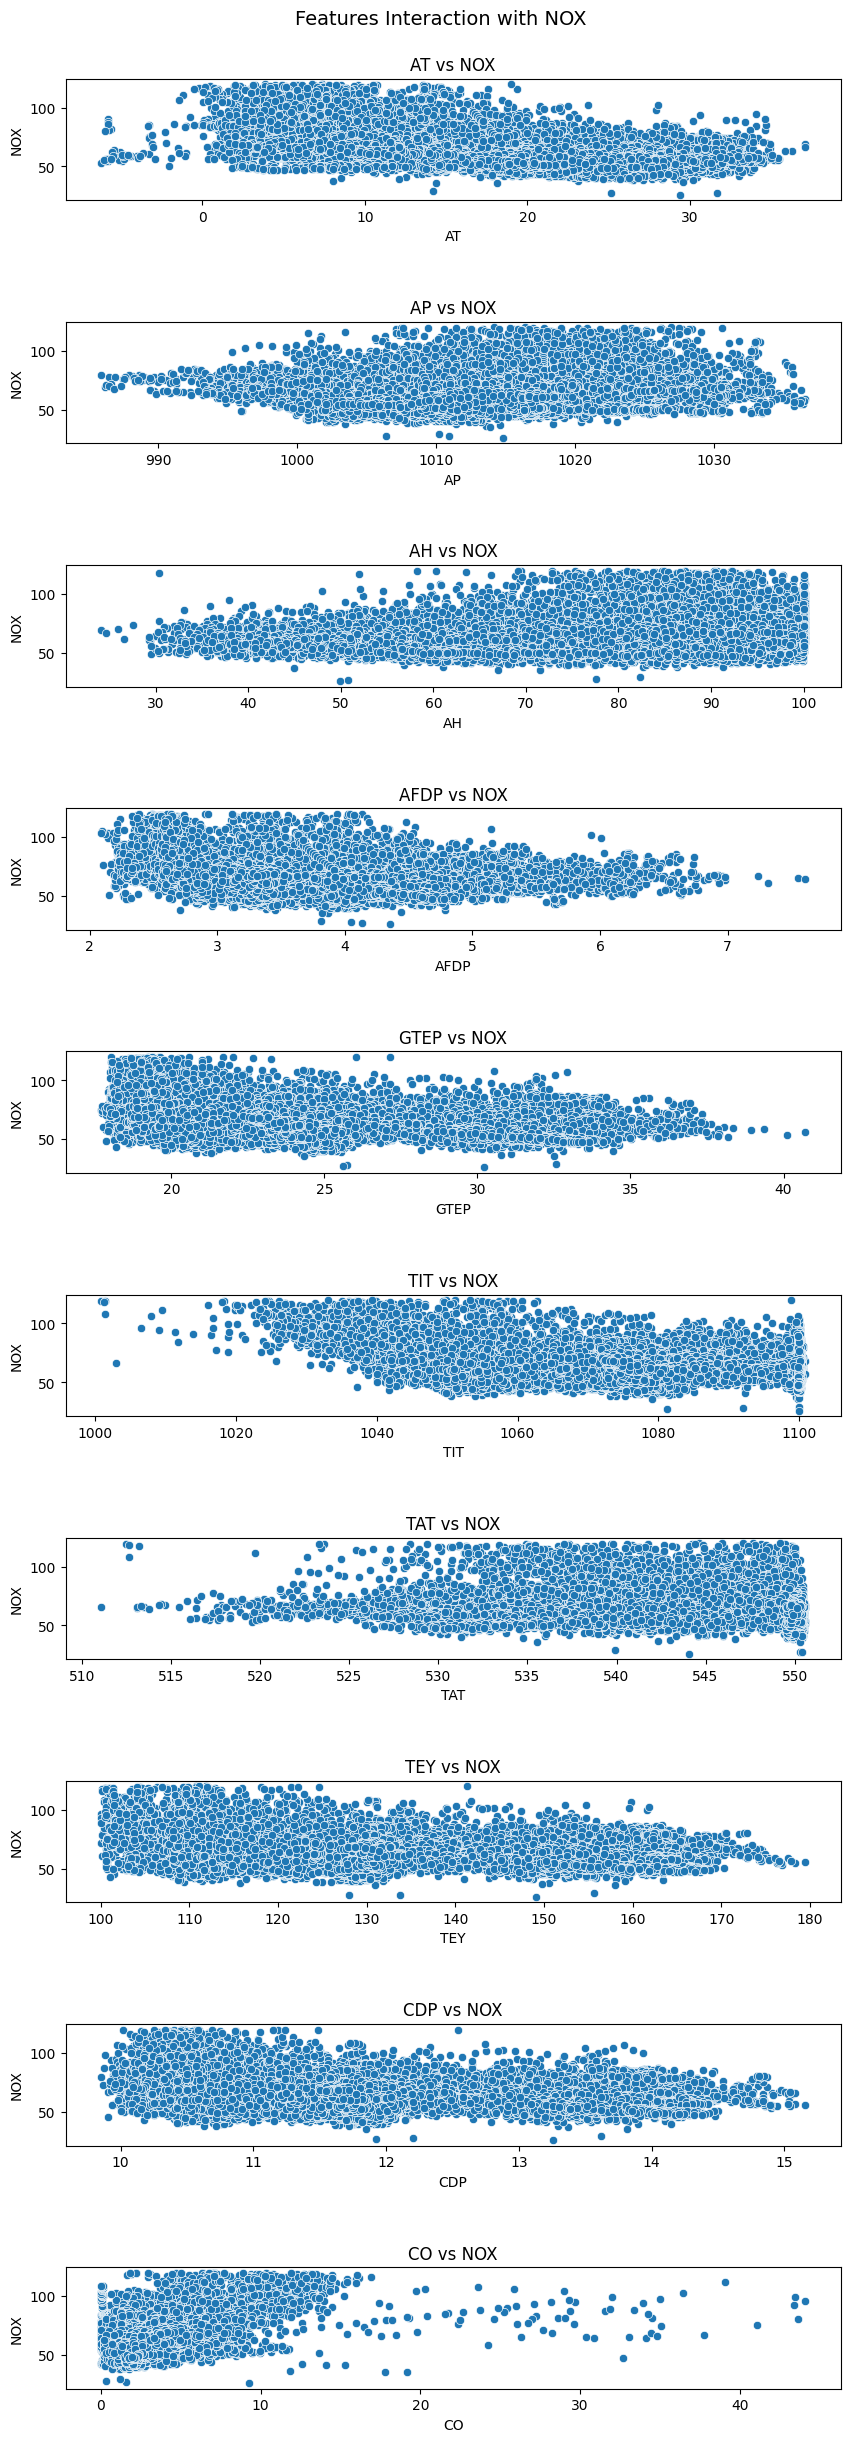

In [ ]:
fig, axes=plt.subplots(10,1,figsize=(10,30))
for i,col in enumerate(df_cols[:-1]):
    sns.scatterplot(x=col,y="NOX", data=df, ax=axes[i])
    axes[i].set_ylabel("NOX")
    axes[i].set_title(f"{col} vs NOX")
fig.text(0.5, 0.9,"Features Interaction with NOX",va="center", ha="center", fontsize=14)
plt.subplots_adjust(hspace=1)
plt.show()

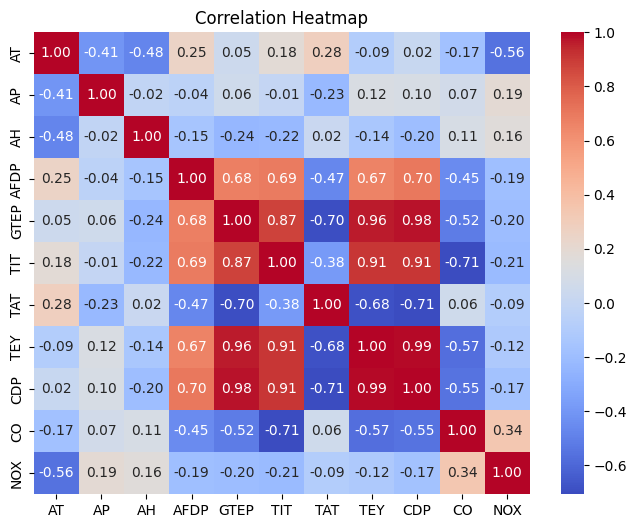

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x = df.iloc[:,:-1]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340


In [ ]:
y = df.iloc[:,-1]
y

0         81.952
1         82.377
2         83.776
3         82.505
4         82.028
          ...   
36728     89.172
36729     88.849
36730     96.147
36731     64.738
36732    109.240
Name: NOX, Length: 36733, dtype: float64

**Processing data**

> Training



In [ ]:
#train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2)

In [ ]:
#train scaling
x_train_scaled = StandardScaler().fit_transform(x_train)
x_train_scaled

array([[-0.22357212, -0.33417306,  0.44197891, ..., -0.28579577,
        -0.37609169,  0.02506632],
       [-0.08864061, -0.5045841 , -0.64050498, ..., -0.0435121 ,
        -0.18298598, -0.50564078],
       [-0.76208983, -0.5045841 ,  1.23453769, ...,  0.10326821,
        -0.11218055, -0.39028291],
       ...,
       [-0.98872106,  2.51633896, -0.67935522, ...,  1.73131192,
         1.80416368, -0.52879068],
       [-0.24330837, -0.90737385,  0.58307028, ..., -0.21657187,
        -0.24367634,  0.28437131],
       [-0.46054139,  0.22353582,  1.4244338 , ...,  0.04686355,
        -0.02390366, -0.47431009]])

In [ ]:
#test scaling
x_test_scaled = StandardScaler().fit_transform(x_test)
x_test_scaled

array([[-1.69478934,  1.49950664,  0.94330262, ...,  1.49056029,
         1.47034629, -0.70186107],
       [-0.18318458, -2.89699485, -1.12988128, ..., -0.25587418,
        -0.35420029,  0.58755223],
       [-1.06719012,  0.40308372,  1.26985365, ..., -1.55866827,
        -1.42142251,  4.73224538],
       ...,
       [-0.35374609, -0.21461934,  1.16420886, ...,  0.01005435,
        -0.13507133, -0.33332466],
       [ 0.81829353,  0.27954311, -1.64675897, ...,  0.0068581 ,
         0.05380133, -0.13463224],
       [ 0.72790936, -0.46170056,  0.39197103, ...,  0.89541736,
         1.03850637, -0.53930731]])

In [ ]:
#Model training
models = [LinearRegression(), Lasso(), Ridge(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), XGBRegressor(), RandomForestRegressor(), ExtraTreesRegressor()]
R2_scores = []
for model in models:
    print(f"Model used: {model}.")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    R2=round(r2_score(y_test, y_pred),4)
    print(f"Accuracy Acquired: {R2}.")
    R2_scores.append(R2)
    print()

Model used: LinearRegression().
Accuracy Acquired: 0.5694.

Model used: Lasso().
Accuracy Acquired: 0.552.

Model used: Ridge().
Accuracy Acquired: 0.5694.

Model used: SVR().
Accuracy Acquired: 0.0596.

Model used: KNeighborsRegressor().
Accuracy Acquired: 0.8073.

Model used: DecisionTreeRegressor().
Accuracy Acquired: 0.7334.

Model used: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_

In [ ]:
#Which model scores best
max_R2=max(R2_scores)
print(f"Best R2 Score Recorded: {max_R2}.")
max_idx=R2_scores.index(max_R2)
best_model=models[max_idx]
print(f"\nBest Model Perfomance: {best_model}.")

Best R2 Score Recorded: 0.8988.

Best Model Perfomance: ExtraTreesRegressor().


In [ ]:
#Evaluation of the best model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
y_pred=model.predict(x_test)
R2=round(r2_score(y_test,y_pred),4)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
print(f"R2 Score: {R2}.")
print(f"Mean Squared Error: {MSE}.")
print(f"Mean Absolute Error: {MAE}.")

R2 Score: 0.8988.
Mean Squared Error: 13.617651340330669.
Mean Absolute Error: 2.3044851136518307.


Visualization

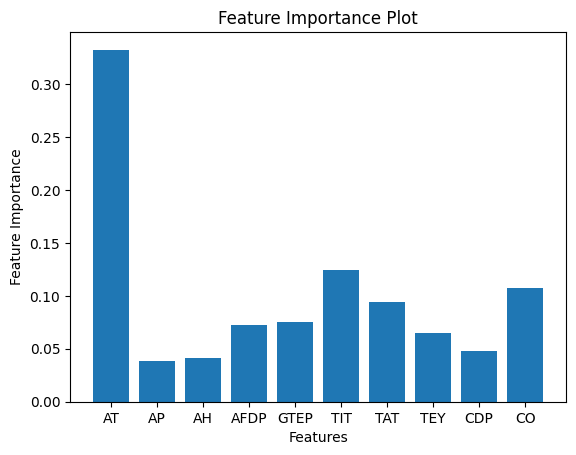

In [ ]:
#Feature importance plot
feature_importances = et.feature_importances_
features = x_train.columns
plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

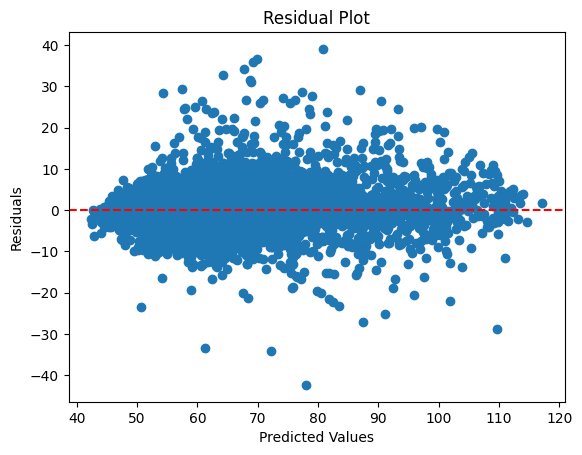

In [ ]:
#Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()